In [48]:
import numpy as np
import time
import math
import random
import glob
from scipy import linalg as LA
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import sampler
import torchvision.transforms as T

import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
float = np.vectorize(float)

def read_file(file_name):
    data = []
    with open(file_name, "r") as f:
        for line in f:
            item = line.strip().split(",")
            data.append(float(item))
    return data

In [51]:
#I = glob.glob('DL Project/20-dim data (41) representation sigma=0.3/*.csv', recursive=True)
#I = glob.glob('DL Project/20-dim data (41) representation old distamce/*.csv', recursive=True)
#I = glob.glob('DL Project/50-dim data (41) representation sigma=0.25/*.csv', recursive=True)
#I = glob.glob('DL Project/50-dim data (41) representation sigma=1000/*.csv', recursive=True)
I = glob.glob('DL Project/50-dim data (41) representation old distamce/*.csv', recursive=True)
#I = glob.glob('DL Project/250-dim data (41) representation sigma=1/*.csv', recursive=True)
#I = glob.glob('DL Project/250-dim data (41) representation old distamce/*.csv', recursive=True)


In [52]:
r = len(I)
r

41

In [53]:
data_embed = [0] * r

for i in range(r):
    data_embed[i] = [len(np.array(read_file(I[i]))), np.array(read_file(I[i]))]

data_embed = np.array(data_embed)
#data_embed = data_embed[data_embed[:,0].argsort()]

In [54]:
X_train = [0] * r
X_test = [0] * r
y_train = [0] * r
y_test = [0] * r

for i in range(r):
    X_train[i], X_test[i], y_train[i], y_test[i] = train_test_split(np.array(data_embed[i][1]), 
                                                                np.ones(len(data_embed[i][1])), 
                                                                test_size=0.3, 
                                                                random_state=109)

In [55]:
for i in range(r):
    X_train[i] = torch.tensor(X_train[i])
    X_test[i] = torch.tensor(X_test[i])
    y_train[i] = torch.tensor(y_train[i])
    y_test[i] = torch.tensor(y_test[i])

In [56]:
X_train[0][0]

tensor([0.0894, 0.0895, 0.1878, 0.2237, 0.2487, 0.2606, 0.2174, 0.1535, 0.1233,
        0.0230, 0.0381, 0.1052, 0.1446, 0.1522, 0.0785, 0.0747, 0.2651, 0.3137,
        0.3166, 0.4247, 0.4089, 0.3639, 0.4056, 0.3045, 0.4469, 0.2612, 0.3823,
        0.3474, 0.5713, 0.6286, 0.7101, 0.6100, 0.6540, 0.6263, 0.6342, 0.3726,
        0.2940, 0.6580, 0.6909, 1.0120, 1.3365, 1.4892, 1.7201, 0.5754, 0.5765,
        1.1204, 1.1804, 0.3535, 0.4736, 0.6166], dtype=torch.float64)

In [57]:
data_embed[:,0]

array([407, 544, 112, 371, 154, 394, 147, 423, 2014, 167, 101, 215, 150,
       583, 318, 173, 148, 146, 150, 196, 747, 295, 100, 260, 389, 2124,
       275, 182, 160, 108, 226, 196, 113, 207, 144, 800, 678, 120, 106,
       382, 133], dtype=object)

# 2-Layer Fully Connected Network

## 10-Class Classification

0 2.3003592491149902
100 1.6519252061843872
200 1.503686785697937
300 1.3084096908569336
400 1.1010472774505615
500 0.9221939444541931
600 0.7896917462348938
700 0.6678414344787598
800 0.5557985305786133
900 0.4554961025714874
1000 0.3696424663066864
1100 0.30116137862205505
1200 0.24994729459285736
1300 0.21155938506126404
1400 0.18389835953712463
1500 0.1638399213552475
1600 0.14930959045886993
1700 0.13878008723258972
1800 0.13090552389621735
1900 0.12483219057321548


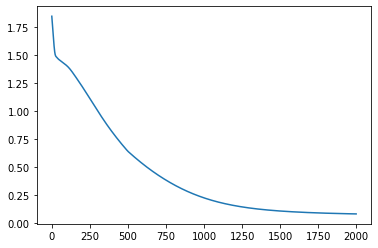

In [45]:
Start_time = time.time()

mean_train_error = 0
mean_test_error = 0
var_test_error = 0


lr_decay = 0.8
num_trials = 1
learning_rate = 1e-3
Num_updates = 2000
losses = torch.zeros(num_trials, r-1, Num_updates)

for s in range(num_trials):

    error_train_list_all = []
    error_test_list_all = []

    Start_time_2 = time.time()

    for i in range(r-9): 

        x = torch.cat((X_train[i], X_train[i+1], X_train[i+2], X_train[i+3], 
                       X_train[i+4],X_train[i+5], X_train[i+6], X_train[i+7],
                       X_train[i+8], X_train[i+9]), 0).float()
        y = torch.cat((0 * y_train[i], y_train[i+1], 2 * y_train[i+2], 3 * y_train[i+3],
                       4 * y_train[i+4], 5 * y_train[i+5], 6 * y_train[i+6], 7* y_train[i+7],
                       8 * y_train[i+8], 9 * y_train[i+9]), 0).long()

        N = len(x) # N is batch size
        D_in = len(x[0]) # D_in is input dimension
        H1 = 200 # H1 is first hidden dimension, 
        H2 = 50 # H2 is second hidden dimension, 
        D_out = 10 # D_out is output dimension

        model = torch.nn.Sequential(
                                    torch.nn.Linear(D_in, H1),
                                    #torch.nn.LeakyReLU(0.01),
                                    torch.nn.Tanh(),
                                    #torch.nn.ReLU(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H1, H2),
                                    #torch.nn.LeakyReLU(0.01),
                                    #torch.nn.ReLU(),
                                    torch.nn.Tanh(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H2, D_out)
                                    )

        loss_fn = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        
        for t in range(Num_updates):
            y_pred = model(x) # of shape (N,D_out)
            loss = loss_fn(y_pred, y)
            losses[s, i, t] = loss

            if i == 20:
                if t % 100 == 0:
                    print(t, loss.item())
            
            if (t+1) % 500 == 0:
                optimizer.param_groups[0]['lr'] = lr_decay * learning_rate

            optimizer.zero_grad()

            loss.backward() # Backward pass

            optimizer.step()  # Calling the step function on the Optimizer 

        X = torch.cat((X_test[i], X_test[i+1], X_test[i+2], X_test[i+3], 
                       X_test[i+4],X_test[i+5], X_test[i+6], X_test[i+7],
                       X_test[i+8], X_test[i+9]), 0).float()
        Y = torch.cat((0 * y_test[i], y_test[i+1], 2 * y_test[i+2], 3 * y_test[i+3],
                       4 * y_test[i+4], 5 * y_test[i+5], 6 * y_test[i+6], 7* y_test[i+7],
                       8 * y_test[i+8], 9 * y_test[i+9]), 0).long()
        
        Y_pred = model(X)
        
        error_train_list_all.append((torch.argmax(y_pred, 1) != y).sum().float()/len(y))
        error_test_list_all.append((torch.argmax(Y_pred, 1) != Y).sum().float()/len(Y))

    mean_train_error += np.mean(error_train_list_all)
    mean_test_error += np.mean(error_test_list_all)
    var_test_error += np.var(error_test_list_all)

mean_train_error /= num_trials
mean_test_error /= num_trials
var_test_error /= num_trials

plt.plot((torch.mean(losses[0], dim=0)).detach().numpy())
plt.show()

#### Old Distance, $|Q|=50$

In [47]:
print('|Q|=50,', 'Old Distance,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = Tanh,", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, learning_rate, 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2',  
                                       'Learning Rate', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=50, Old Distance, Number of Users:  41, Number of Trials =  1
Activation = Tanh, Learning Decay = 0.8, Number of Updates =  2000


,Classifier,Hid_dim 1,Hid_dim 2,Learning Rate,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,200,50,0.001,0.0356,0.4827,0.0083


#### New Distance, $|Q|=50$, $\sigma=1000$

In [30]:
print('|Q|=50,', 'New Distance,', 'sigma=1000,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = LeakyReLU(0.01),", 'Learning Decay = 0.8,', 
      "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, learning_rate, 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2',  
                                       'Learning Rate', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=50, New Distance, sigma=1000, Number of Users:  41, Number of Trials =  1
Activation = LeakyReLU(0.01), Learning Decay = 0.8, Number of Updates =  1000


,Classifier,Hid_dim 1,Hid_dim 2,Learning Rate,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,300,50,0.02,0.474,0.5478,0.0059


#### New Distance, $|Q|=50$, $\sigma=0.25$

In [12]:
print('|Q|=50,', 'New Distance,', 'sigma=0.25,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = LeakyReLU(0.01),", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, learning_rate, 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2',  
                                       'Learning Rate', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=50, New Distance, sigma=0.25, Number of Users:  41, Number of Trials =  1
Activation = LeakyReLU(0.01), Learning Decay = 0.8, Number of Updates =  100


,Classifier,Hid_dim 1,Hid_dim 2,Learning Rate,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,500,200,0.01,0.0375,0.4334,0.0074


#### New Distance, $|Q|=20$, $\sigma=0.3$

In [15]:
print('|Q|=20,', 'New Distance,', 'sigma=0.3,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = LeakyReLU(0.01),", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, learning_rate, 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2',  
                                       'Learning Rate', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=20, New Distance, sigma=0.3, Number of Users:  41, Number of Trials =  1
Activation = LeakyReLU(0.01), Learning Decay = 0.8, Number of Updates =  10000


,Classifier,Hid_dim 1,Hid_dim 2,Learning Rate,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,50,20,0.01,0.307,0.4337,0.0046


#### Old Distance, $|Q|=20$

In [20]:
print('|Q|=20,', 'Old Distance,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = Tanh,", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}

models = ["Fully Connected 2-Layer"]

for k in range(len(models)): 
    Dic_1[k+1] = [models[k], H1, H2, None, learning_rate, "len(x)", 
                  np.round(mean_train_error, decimals = 4), 
                  np.round(mean_test_error, decimals = 4),
                  np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', columns=['Classifier', 'Hid_dim 1',
                'Hid_dim 2', 'Drop Out p', 'Learning Rate', 'Batch Normaln', 
                 'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=20, Old Distance, Number of Users:  41, Number of Trials =  1
Activation = Tanh, Learning Decay = 0.8, Number of Updates =  10000


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch Normaln,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,50,20,None,0.001,len(x),0.1693,0.212,0.0015


# -------------------------------------------------------------------

## Binary Classification

0 0.7542658448219299
500 0.5004701614379883
1000 0.35352766513824463
1500 0.1922881007194519
2000 0.12765829265117645
2500 0.09131522476673126
3000 0.0691358670592308
3500 0.054525572806596756


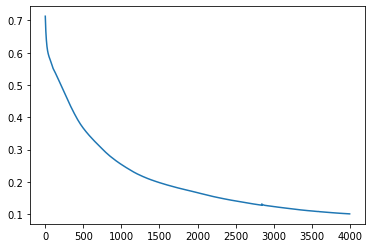

In [75]:
Start_time = time.time()

mean_train_error = 0
mean_test_error = 0
var_test_error = 0

num_trials = 1
learning_rate = 1e-3
Num_updates = 4000
losses = torch.zeros(num_trials, r-1, Num_updates)

for s in range(num_trials):

    error_train_list_all = []
    error_test_list_all = []

    Start_time_2 = time.time()

    for i in range(r-1): 
        j = i+1

        x = torch.cat((X_train[i], X_train[j]), 0).float()
        y = torch.cat((y_train[i], 
                       torch.zeros(y_train[j].size(), dtype=torch.double)), 0).long()

        N = len(x) # N is batch size
        D_in = len(x[0]) # D_in is input dimension
        H1 = 10 # H1 is first hidden dimension, 
        H2 = 5 # H2 is second hidden dimension, 
        D_out = 2 # D_out is output dimension
        q = 0.25

        model = torch.nn.Sequential(
                                    torch.nn.Linear(D_in, H1),
                                    #torch.nn.LeakyReLU(0.1),
                                    torch.nn.Tanh(),
                                    #torch.nn.ReLU(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H1, H2),
                                    #torch.nn.LeakyReLU(0.1),
                                    #torch.nn.ReLU(),
                                    torch.nn.Tanh(),
                                    #torch.nn.Dropout(p=q),
                                    torch.nn.Linear(H2, D_out)
                                    )

        loss_fn = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
        
        for t in range(Num_updates):
            y_pred = model(x) # of shape (N,D_out)
            loss = loss_fn(y_pred, y)
            losses[s, i, t] = loss

            if i == 20:
                if t % 500 == 0:
                    print(t, loss.item())
            
            if (t+1) % 100 == 0:
                optimizer.param_groups[0]['lr'] = 0.5 * learning_rate

            optimizer.zero_grad()

            loss.backward() # Backward pass

            optimizer.step()  # Calling the step function on the Optimizer 

        X = torch.cat((X_test[i], X_test[j]), 0).float()
        Y = torch.cat((y_test[i], torch.zeros(y_test[j].size(), 
                                              dtype=torch.double)), 0).long()
        
        Y_pred = model(X)
        
        error_train_list_all.append((torch.argmax(y_pred, 1) != y).sum().float()/len(y))
        error_test_list_all.append((torch.argmax(Y_pred, 1) != Y).sum().float()/len(Y))

    mean_train_error += np.mean(error_train_list_all)
    mean_test_error += np.mean(error_test_list_all)
    var_test_error += np.var(error_test_list_all)

mean_train_error /= num_trials
mean_test_error /= num_trials
var_test_error /= num_trials

plt.plot((torch.mean(losses[0], dim=0)).detach().numpy())
plt.show()

#### Old Distance, $|Q|=50$

In [78]:
print('|Q|=50,', 'Old Distance,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = Tanh,", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, None, learning_rate, "len(x)", 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2', 'Drop Out p', 
                                       'Learning Rate', 'Batch Normaln', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=50, Old Distance, Number of Users:  41, Number of Trials =  1
Activation = Tanh, Learning Decay = 0.8, Number of Updates =  4000


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch Normaln,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,10,5,None,0.001,len(x),0.0347,0.062,0.0015


#### New Distance, $|Q|=50$, $\sigma=1000$

In [112]:
print('|Q|=50,', 'New Distance,', 'sigma=1000,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = LeakyReLU(0.1),", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, None, learning_rate, "len(x)", 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2', 'Drop Out p', 
                                       'Learning Rate', 'Batch Normaln', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=20, New Distance, sigma=1000, Number of Users:  41, Number of Trials =  1
Activation = LeakyReLU(0.1), Learning Decay = 0.8, Number of Updates =  1000


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch Normaln,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,10,5,None,0.01,len(x),0.1523,0.2846,0.0102


#### New Distance, $|Q|=50$, $\sigma=0.25$

In [69]:
print('|Q|=50,', 'New Distance,', 'sigma=0.25,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = Tanh,", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, None, learning_rate, "len(x)", 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2', 'Drop Out p', 
                                       'Learning Rate', 'Batch Normaln', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=20, New Distance, sigma=0.25, Number of Users:  41, Number of Trials =  1
Activation = Tanh, Learning Decay = 0.8, Number of Updates =  100


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch Normaln,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,100,10,None,0.01,len(x),0.0087,0.2008,0.0059


#### New Distance, $|Q|=20$, $\sigma=0.3$

In [39]:
print('|Q|=20,', 'New Distance,', 'sigma=0.3,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = Tanh,", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}


Dic_1[1] = ["Fully Connected 2-Layer", H1, H2, None, learning_rate, "len(x)", 
              np.round(mean_train_error, decimals = 4), 
              np.round(mean_test_error, decimals = 4),
              np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', 
                              columns=['Classifier', 'Hid_dim 1', 'Hid_dim 2', 'Drop Out p', 
                                       'Learning Rate', 'Batch Normaln', 
                                       'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=20, New Distance, sigma=0.3, Number of Users:  41, Number of Trials =  1
Activation = Tanh, Learning Decay = 0.8, Number of Updates =  1000


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch Normaln,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,10,20,None,0.05,len(x),0.0675,0.1844,0.0061


#### Old Distance, $|Q|=20$

In [15]:
print('|Q|=20,', 'Old Distance,', "Number of Users: ", "41,", 
      'Number of Trials = ', num_trials)
print("Activation = Tanh,", 'Learning Decay = 0.8,', "Number of Updates = ", Num_updates)
Dic_1 = {}

models = ["Fully Connected 2-Layer"]

for k in range(len(models)): 
    Dic_1[k+1] = [models[k], H1, H2, None, learning_rate, "len(x)", 
                  np.round(mean_train_error, decimals = 4), 
                  np.round(mean_test_error, decimals = 4),
                  np.round(var_test_error, decimals = 4)]
    
df_1 = pd.DataFrame.from_dict(Dic_1, orient='index', columns=['Classifier', 'Hid_dim 1',
                'Hid_dim 2', 'Drop Out p', 'Learning Rate', 'Batch Normaln', 
                 'Train Error', 'Test Error', 'Var_Error'])
df_1

|Q|=20, Old Distance, Number of Users:  41, Number of Trials =  1
Activation = Tanh, Learning Decay = 0.8, Number of Updates =  20000


,Classifier,Hid_dim 1,Hid_dim 2,Drop Out p,Learning Rate,Batch Normaln,Train Error,Test Error,Var_Error
1,Fully Connected 2-Layer,10,5,None,0.001,len(x),0.0427,0.0776,0.0022
